# Comparing Classifiers

**1. Overview**: The goal is to compare the performance of classifiers, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines over a Portuguese bank marketing campaign dataset.  

**2. Background**

In order to succeed in a highly competitive market, companies must employ effective marketing strategies that optimize expenditures and enhance customer satisfaction. This dataset contains information about direct phone call marketing campaigns conducted by a Portuguese banking institution from May 2008 to November 2010. The objective of the project is to help the bank gain a more detailed understanding of its customer base, predict how customers will respond to its telemarketing campaign, and create a target customer profile for future marketing plans. By analyzing customer features, such as demographics and transaction history, the bank can predict customer saving behaviors and identify which types of customers are more likely to make term deposits. This information enables the bank to focus its marketing efforts on those customers, leading to more effective deposit acquisition and fewer unwanted advertisements for certain customers. Ultimately, this not only increases the bank's deposit acquisition success rate but also enhances overall customer satisfaction.

**2. Get the Data: Use pandas to use to read the datasets as dataframe**

In [275]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [276]:
bank = pd.read_csv('/content/drive/MyDrive/Marketing-Classifier-Comparison/bank-additional-full.csv', sep=';')

In [277]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**3. Understanding the Features**


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

In [278]:
bank.shape

(41188, 21)

**4. Data Inspection and Column Type Investigation**

In [279]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset contains 41,188 rows and 17 columns. There are 21 columns with integer data type and 11 columns with object data type. There are no missing values in this dataset.

**Data type conversions**

In [280]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
bank['job_encoded'] = label_encoder.fit_transform(bank['job'])
bank['marital_encoded'] = label_encoder.fit_transform(bank['marital'])
bank['education_encoded'] = label_encoder.fit_transform(bank['education'])
bank['default_encoded'] = label_encoder.fit_transform(bank['default'])
bank['housing_encoded'] = label_encoder.fit_transform(bank['housing'])
bank['loan_encoded'] = label_encoder.fit_transform(bank['loan'])
bank['contact_encoded'] = label_encoder.fit_transform(bank['contact'])
bank['month_encoded'] = label_encoder.fit_transform(bank['month'])
bank['day_of_week_encoded'] = label_encoder.fit_transform(bank['day_of_week'])
bank['poutcome_encoded'] = label_encoder.fit_transform(bank['poutcome'])
bank['y_encoded'] = label_encoder.fit_transform(bank['y'])


In [281]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,6,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,3,1,0,0,1,6,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,3,0,2,0,1,6,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,1,0,0,0,1,6,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,3,0,0,2,1,6,1,1,0


In [282]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  object 
 15  emp.var.rate         41188 non-null 

In [283]:
unique_values = bank['poutcome'].unique()
print(unique_values)


['nonexistent' 'failure' 'success']


In [284]:
value_counts = bank['poutcome'].value_counts()
print(value_counts)


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


In [285]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,6,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,3,1,0,0,1,6,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,3,0,2,0,1,6,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,1,0,0,0,1,6,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,3,0,0,2,1,6,1,1,0


In [286]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  object 
 15  emp.var.rate         41188 non-null 

**5. Checking the Target Variable (y)**

no     36548
yes     4640
Name: y, dtype: int64


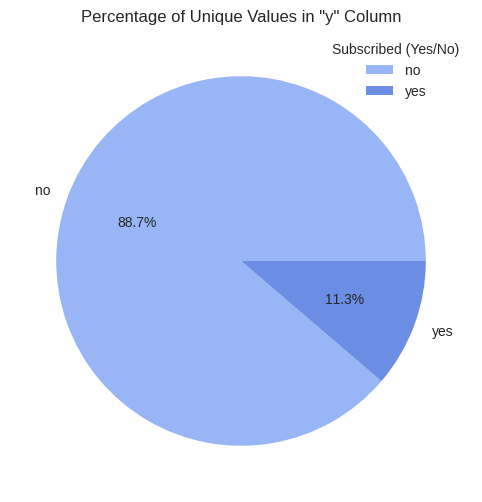

In [287]:
# Count unique values in 'y' column
unique_counts = bank['y'].value_counts()
print(unique_counts)
# Create a pie chart with the percentage of each unique value in 'y' column
plt.figure(figsize=(8,6))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', colors=['#98b6f5','#6b8ee4'])
plt.title('Percentage of Unique Values in "y" Column')
plt.legend(title='Subscribed (Yes/No)', loc='best')
plt.show()


Target variable (y) has two unique values: 'yes' and 'no'. The majority of the customers in the dataset did not subscribe to a term deposit, as there are significantly more 'no' values (36,548) than 'yes' values (4,640).

**6. Exploring feature characteristics and visualizing their distribution**


In [288]:
# Calculate descriptive statistics for 'duration'
duration_stats = bank['duration'].describe()

# Print the descriptive statistics
print(duration_stats)

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


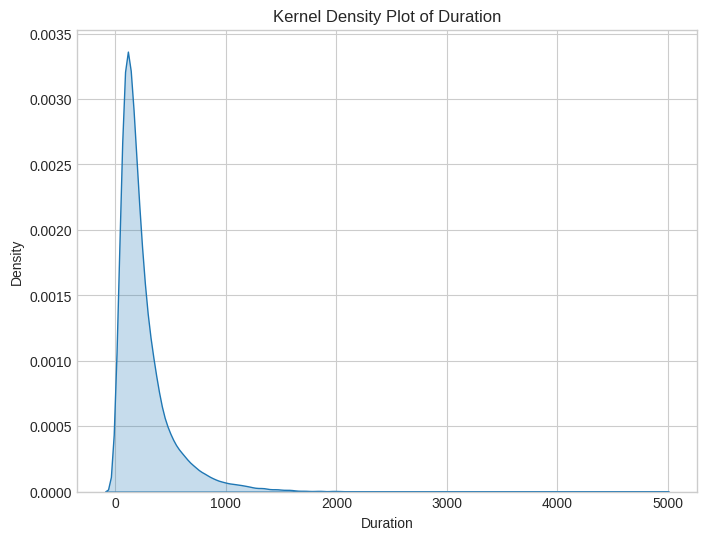

In [289]:
# Kernel Density Plot for the 'duration' column
plt.figure(figsize=(8, 6))
sns.kdeplot(data=bank, x='duration', fill=True)
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Duration')
plt.show()

The majority of the data falls between -2000 and 2000, with a long tail on the right indicating the presence of some high balance accounts. Overall, the distribution appears to be more normal and less skewed compared to the original distribution.

**Checking the 'job' column**

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


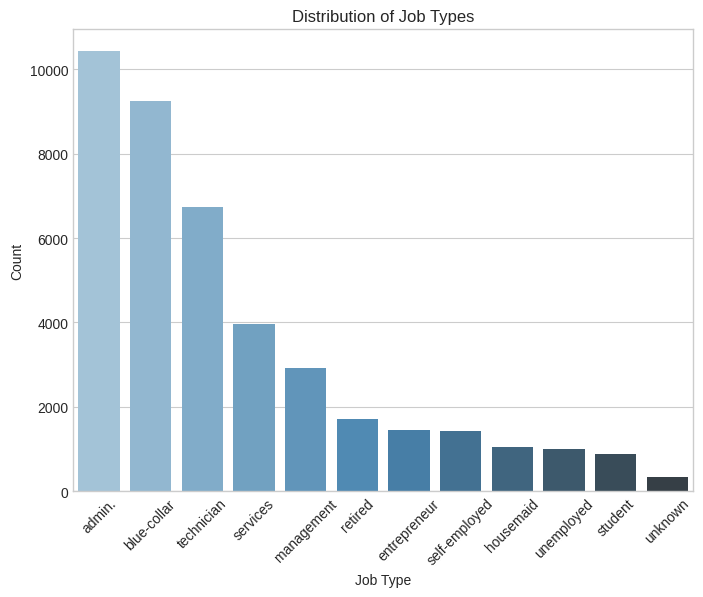

In [290]:
# Count the number of each job type
job_count = bank['job'].value_counts()
print(job_count)

# Create a bar plot of job count
plt.figure(figsize=(8,6))
sns.barplot(x=job_count.index, y=job_count.values, palette='Blues_d')
plt.xticks(rotation=45)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Distribution of Job Types')
plt.show()



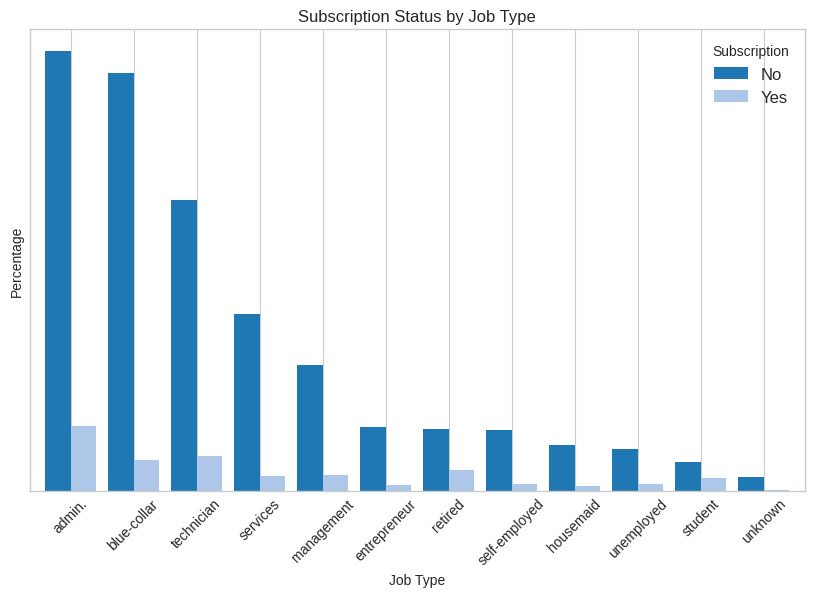

In [291]:
# Count the number of "yes" and "no" values in the "y" column by job type
job_sub_counts = bank.groupby(['job', 'y'])['y'].count().unstack()
job_sub_counts = job_sub_counts.apply(lambda x: round(100 * x / x.sum(), 2) if x.name == 'yes' else x, axis=1)

# Sort the dataframe by descending order of "no" subscriptions
job_sub_counts = job_sub_counts.sort_values(by='no', ascending=False)

custom_colors = ['#1f77b4', '#aec7e8']
ax = job_sub_counts.plot(kind='bar', stacked=False, figsize=(10,6), width=0.8,
                          color=custom_colors)
plt.xlabel('Job Type')
plt.ylabel('Percentage')
plt.title('Subscription Status by Job Type')
plt.xticks(rotation=45)
ax.legend(['No', 'Yes'], title='Subscription', fontsize=12, loc='upper right')
plt.yticks([])
plt.show()


The highest percentage of "yes" subscriptions is for customers with the job type of "student", followed by "retired" and "unemployed". On the other hand, the lowest percentage of "yes" subscriptions is for customers with the job type of "blue-collar", followed by "services" and "entrepreneur".

**Checcking the 'marital' and 'education' columns**

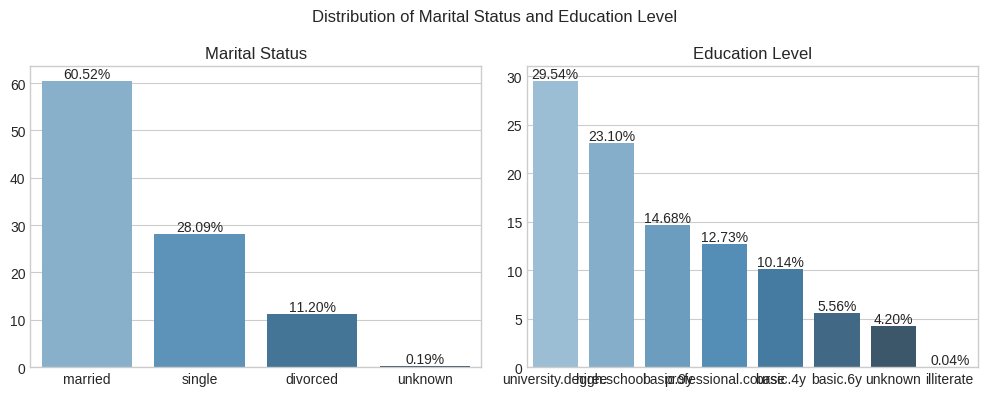

In [292]:
# Get the counts of each category in the 'marital' and 'education' columns
marital_counts = bank['marital'].value_counts()
education_counts = bank['education'].value_counts()

# Calculate the percentages
marital_perc = marital_counts / marital_counts.sum() * 100
education_perc = education_counts / education_counts.sum() * 100

# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the distribution of 'marital' column
sns.barplot(x=marital_perc.index, y=marital_perc.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Marital Status')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'education' column
sns.barplot(x=education_perc.index, y=education_perc.values, ax=axes[1], palette='Blues_d')
axes[1].set_title('Education Level')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

fig.suptitle('Distribution of Marital Status and Education Level')
plt.tight_layout()
plt.show()


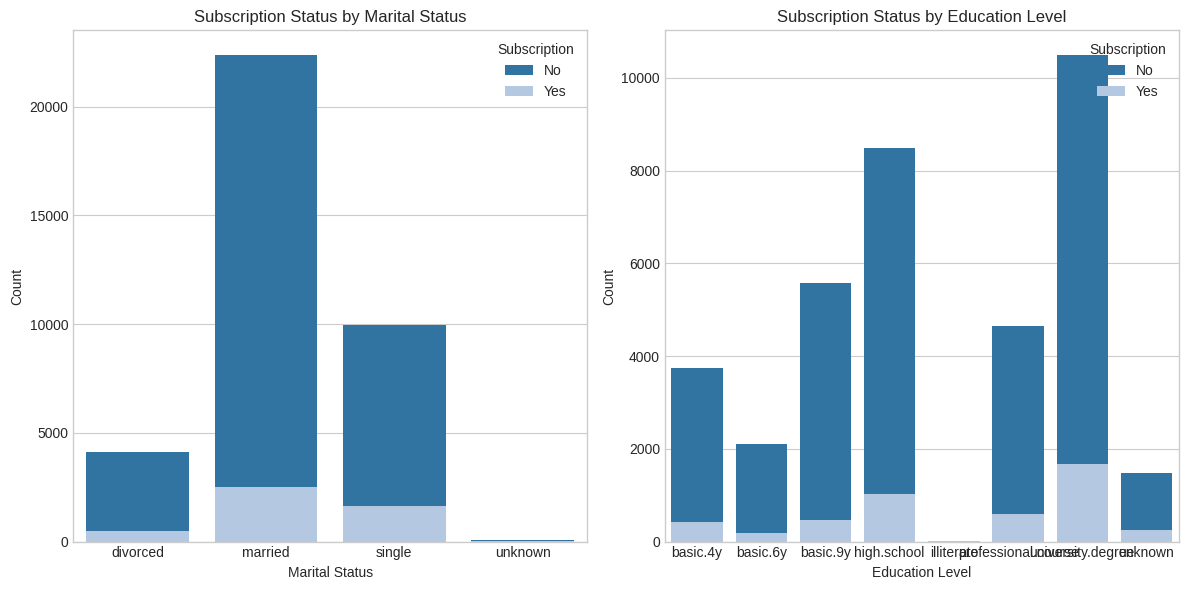

In [293]:
# Group the data by 'marital' and 'y' columns and count the occurrences
marital_counts = bank.groupby(['marital', 'y']).size().unstack(fill_value=0)
education_counts = bank.groupby(['education', 'y']).size().unstack(fill_value=0)
marital_perc = marital_counts.div(marital_counts.sum(axis=1), axis=0).mul(100).round(2)
education_perc = education_counts.div(education_counts.sum(axis=1), axis=0).mul(100).round(2)

# Plot the counts for 'marital' and 'education' columns side by side
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.barplot(x=marital_counts.index, y='no', data=marital_counts, ax=axs[0], color='#1f77b4', label='No')
sns.barplot(x=marital_counts.index, y='yes', data=marital_counts, ax=axs[0], color='#aec7e8', label='Yes')
sns.barplot(x=education_counts.index, y='no', data=education_counts, ax=axs[1], color='#1f77b4', label='No')
sns.barplot(x=education_counts.index, y='yes', data=education_counts, ax=axs[1], color='#aec7e8', label='Yes')

# Add titles and labels to the subplots
axs[0].set_title('Subscription Status by Marital Status')
axs[1].set_title('Subscription Status by Education Level')
axs[0].set_xlabel('Marital Status')
axs[1].set_xlabel('Education Level')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
axs[0].legend(title='Subscription', fontsize=10, loc='upper right')
axs[1].legend(title='Subscription', fontsize=10, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

*   Marital status: Majority of subscribers are married, followed by single and divorced. However, the proportion of subscribers is highest among those who are single (around 14% subscribed), compared to around 10% for both married and divorced individuals.List item
*   Education level: the proportion of subscribers is highest among those with a tertiary education (around 15%), followed by those with a secondary education (around 10%), and then those with a primary education (around 7%).



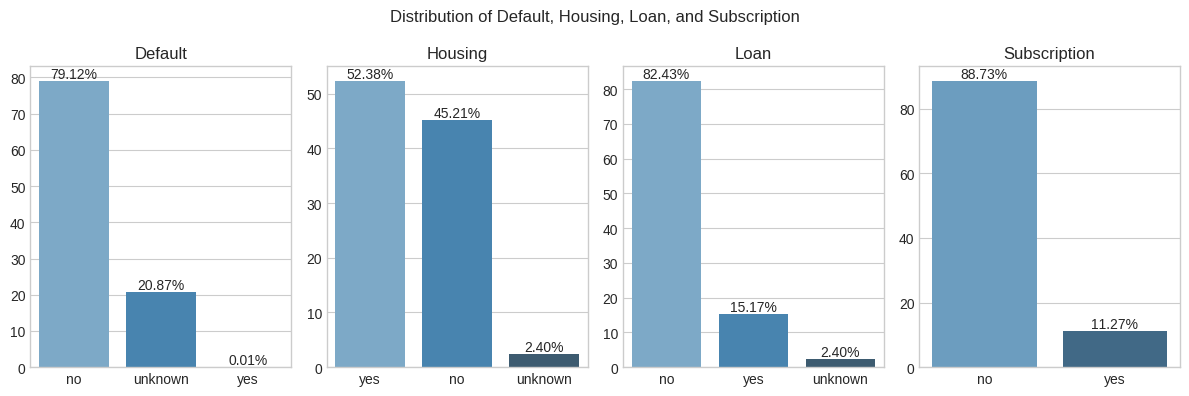

In [294]:
# Get the counts of each category in the 'default', 'housing', 'loan', and 'y' columns
default_counts = bank['default'].value_counts()
housing_counts = bank['housing'].value_counts()
loan_counts = bank['loan'].value_counts()
subscription_counts = bank['y'].value_counts()

# Calculate the percentages
default_perc = default_counts / default_counts.sum() * 100
housing_perc = housing_counts / housing_counts.sum() * 100
loan_perc = loan_counts / loan_counts.sum() * 100
subscription_perc = subscription_counts / subscription_counts.sum() * 100

# Create a figure with four subplots arranged horizontally
fig, axes = plt.subplots(ncols=4, figsize=(12, 4))

# Plot the distribution of 'default' column
sns.barplot(x=default_perc.index, y=default_perc.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Default')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'housing' column
sns.barplot(x=housing_perc.index, y=housing_perc.values, ax=axes[1], palette='Blues_d')
axes[1].set_title('Housing')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'loan' column
sns.barplot(x=loan_perc.index, y=loan_perc.values, ax=axes[2], palette='Blues_d')
axes[2].set_title('Loan')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'y' column (subscription)
sns.barplot(x=subscription_perc.index, y=subscription_perc.values, ax=axes[3], palette='Blues_d')
axes[3].set_title('Subscription')
for p in axes[3].patches:
    axes[3].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

fig.suptitle('Distribution of Default, Housing, Loan, and Subscription')
plt.tight_layout()
plt.show()


### **Checking the 'defualt', 'housing' and 'loan' columns**

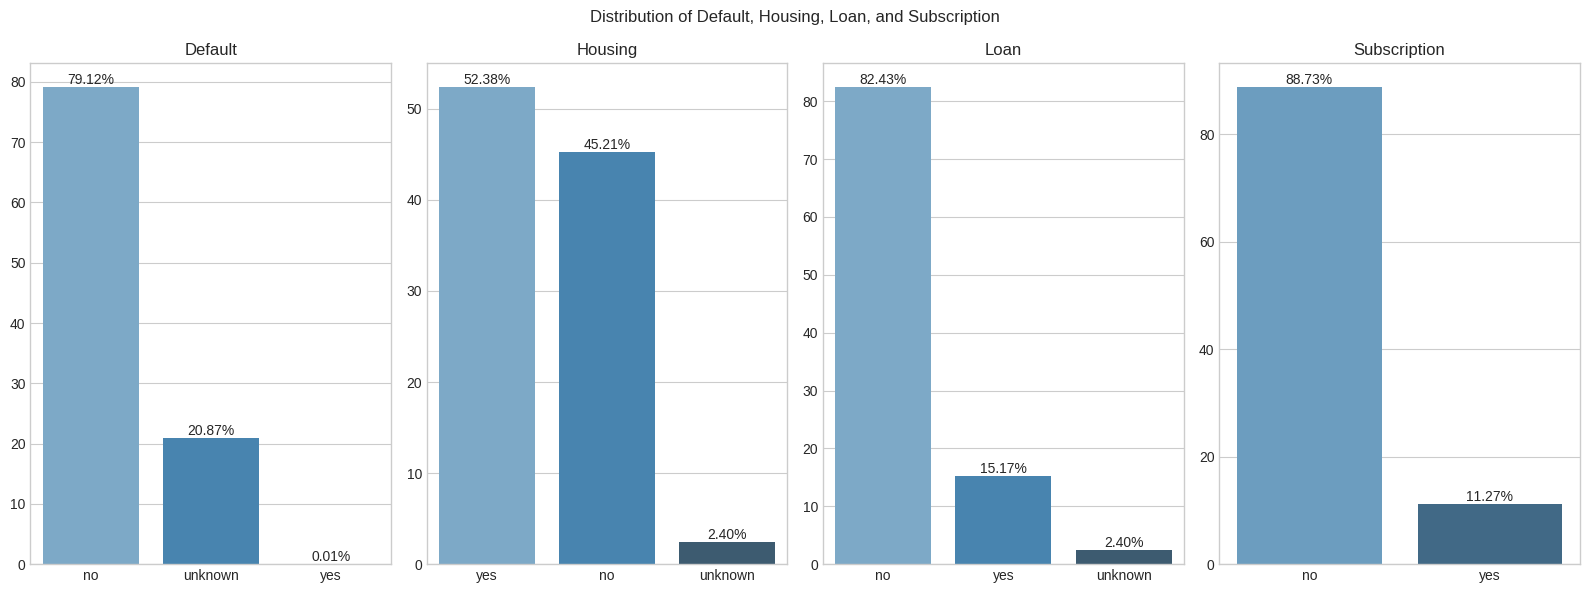

In [295]:
# Get the counts of each category in the 'default', 'housing', 'loan', and 'y' columns
default_counts = bank['default'].value_counts()
housing_counts = bank['housing'].value_counts()
loan_counts = bank['loan'].value_counts()
subscription_counts = bank['y'].value_counts()

# Calculate the percentages
default_perc = default_counts / default_counts.sum() * 100
housing_perc = housing_counts / housing_counts.sum() * 100
loan_perc = loan_counts / loan_counts.sum() * 100
subscription_perc = subscription_counts / subscription_counts.sum() * 100

# Create a figure with four subplots arranged horizontally
fig, axes = plt.subplots(ncols=4, figsize=(16,6))

# Plot the distribution of 'default' column
sns.barplot(x=default_perc.index, y=default_perc.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Default')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'housing' column
sns.barplot(x=housing_perc.index, y=housing_perc.values, ax=axes[1], palette='Blues_d')
axes[1].set_title('Housing')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'loan' column
sns.barplot(x=loan_perc.index, y=loan_perc.values, ax=axes[2], palette='Blues_d')
axes[2].set_title('Loan')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Plot the distribution of 'y' column (subscription)
sns.barplot(x=subscription_perc.index, y=subscription_perc.values, ax=axes[3], palette='Blues_d')
axes[3].set_title('Subscription')
for p in axes[3].patches:
    axes[3].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

fig.suptitle('Distribution of Default, Housing, Loan, and Subscription')
plt.tight_layout()
plt.show()


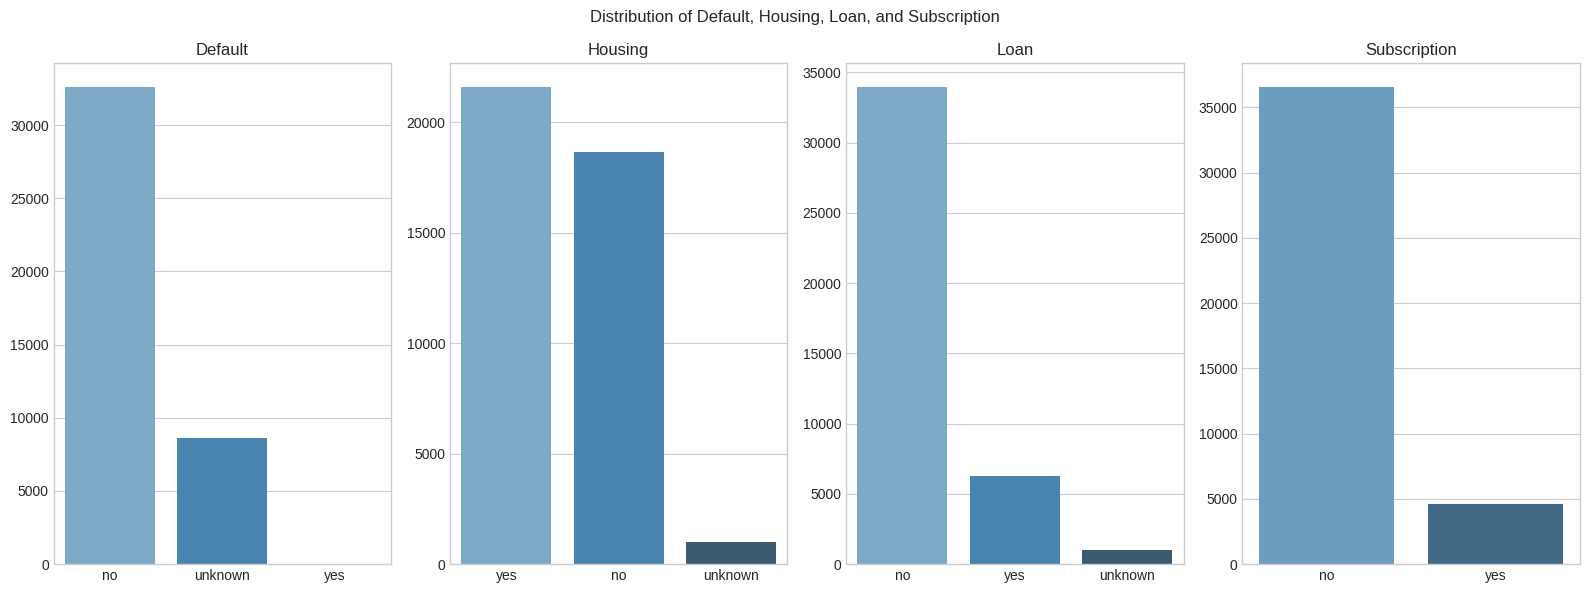

In [296]:
# Get the counts of each category in the 'default', 'housing', 'loan', and 'y' columns
default_counts = bank['default'].value_counts()
housing_counts = bank['housing'].value_counts()
loan_counts = bank['loan'].value_counts()
subscription_counts = bank['y'].value_counts()

# Create a figure with four subplots arranged horizontally
fig, axes = plt.subplots(ncols=4, figsize=(16,6))

# Plot the distribution of 'default' column
sns.barplot(x=default_counts.index, y=default_counts.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Default')

# Plot the distribution of 'housing' column
sns.barplot(x=housing_counts.index, y=housing_counts.values, ax=axes[1], palette='Blues_d')
axes[1].set_title('Housing')

# Plot the distribution of 'loan' column
sns.barplot(x=loan_counts.index, y=loan_counts.values, ax=axes[2], palette='Blues_d')
axes[2].set_title('Loan')

# Plot the distribution of 'y' column (subscription)
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, ax=axes[3], palette='Blues_d')
axes[3].set_title('Subscription')

fig.suptitle('Distribution of Default, Housing, Loan, and Subscription')
plt.tight_layout()
plt.show()


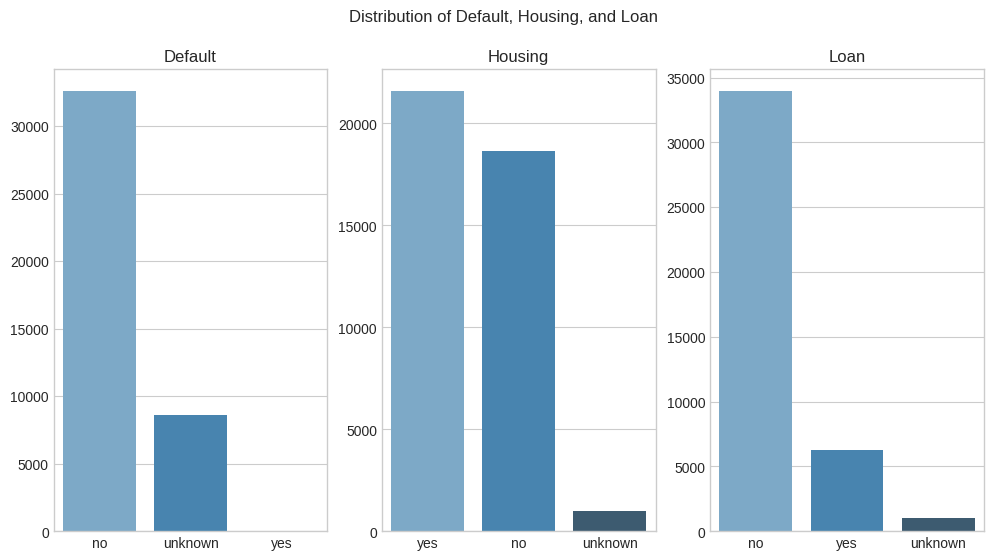

In [297]:
# Get the counts of each category in the 'default', 'housing', and 'loan' columns
default_counts = bank['default'].value_counts()
housing_counts = bank['housing'].value_counts()
loan_counts = bank['loan'].value_counts()

# Create a figure with three subplots arranged horizontally
fig, axes = plt.subplots(ncols=3, figsize=(12,6))
sns.barplot(x=default_counts.index, y=default_counts.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('Default')
sns.barplot(x=housing_counts.index, y=housing_counts.values, ax=axes[1], palette='Blues_d')
axes[1].set_title('Housing')
sns.barplot(x=loan_counts.index, y=loan_counts.values, ax=axes[2], palette='Blues_d')
axes[2].set_title('Loan')
fig.suptitle('Distribution of Default, Housing, and Loan')
plt.show()


The plots indicate that the majority of customers do not have a default, have a housing loan, and do not have a personal loan.

### **The dataset contains various insights and correlations that can be explored and analyzed**

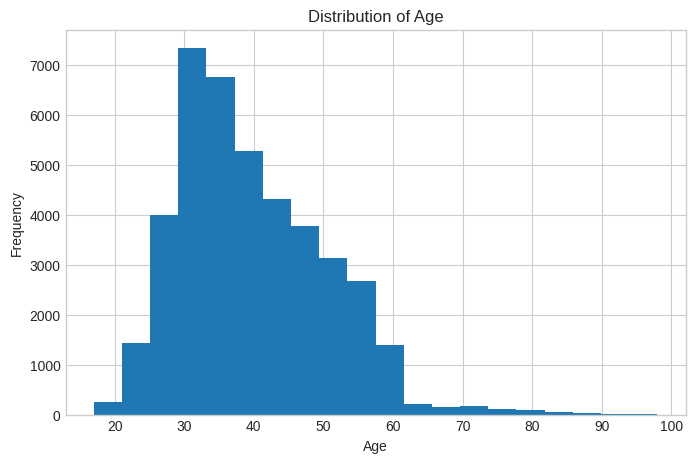

In [298]:
# Plot the histogram of age column
fig, ax = plt.subplots(figsize=(8, 5))
color1 = '#1f77b4'
ax.hist(bank['age'], bins=20, color=color1)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Age')

# Show the plot
plt.show()

The plot shows that the age distribution is roughly normal with a peak in the late 20s to early 30s.

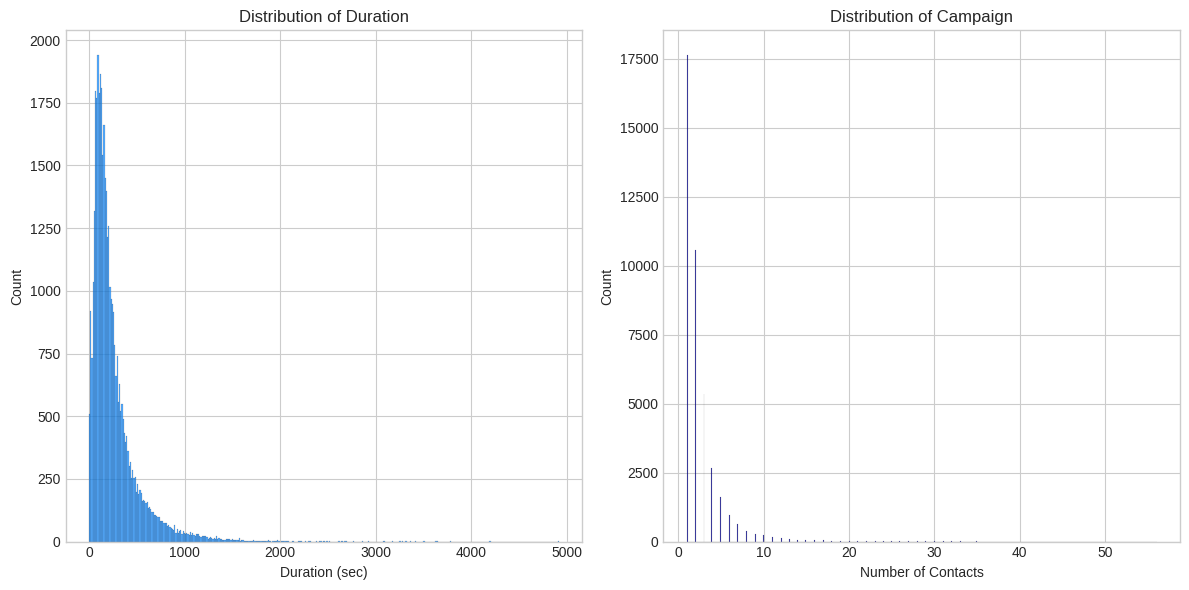

In [299]:
# Plot histogram of duration and campaign

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(bank['duration'], kde=False, color='dodgerblue')
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Duration')
plt.subplot(1,2,2)
sns.histplot(bank['campaign'], kde=False, color='darkblue')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.title('Distribution of Campaign')
plt.tight_layout()

# Show the plot
plt.show()


The first subplot on the left shows the distribution of the duration variable and most of the calls lasted for a short duration (less than 500 seconds), with a peak around 100 seconds. The number of calls decreased as the duration increased.

The second subplot on the right shows the distribution of the campaign variable, which represents the number of contacts made during the current marketing campaign for each client, and most clients were contacted only a few times during the campaign, with the highest count for one contact. There are also a few clients who were contacted many times (over 30).

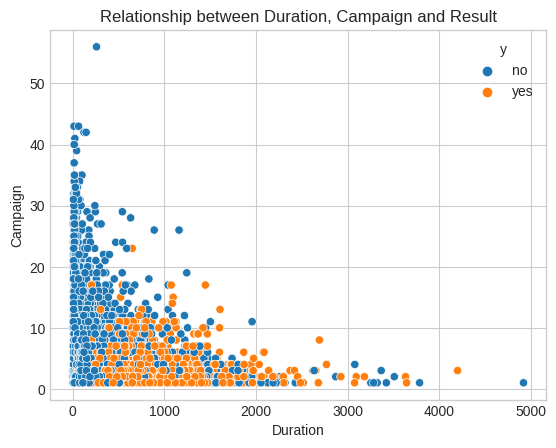

In [300]:
# Create a scatter plot of 'duration' vs. 'campaign', colored by 'y'

result_counts = bank['y'].value_counts()
sns.scatterplot(x='duration', y='campaign', hue='y', data=bank)
plt.title('Relationship between Duration, Campaign and Result')
plt.xlabel('Duration')
plt.ylabel('Campaign')

# Show the plot
plt.show()


The plot shows that the clients who subscribed to a term deposit tended to have longer durations of the last contact and were contacted fewer times during the current campaign compared to those who did not subscribe. This suggests that longer conversations may have had a positive impact on the clients' decision to subscribe.

**Baseline model: Train/Test/Split**

In [301]:
# Split the data into features (X) and target variable (y)
X = bank.drop('y', axis=1)
y = bank['y']

# Split the data into training and testing sets, with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print(f'Dummy Classifier Accuracy: {accuracy_score(y_test, y_pred_dummy):.2%}')

# Prepare the data for modeling
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Combine the training and test sets to ensure consistent one-hot encoding
combined_data = pd.concat([X_train, X_test])

# One-hot encode the categorical columns in the combined data
combined_data_encoded = pd.get_dummies(combined_data, columns=cat_vars, drop_first=True)

# Split the data back into training and test sets
X_train_encoded = combined_data_encoded[:len(X_train)]
X_test_encoded = combined_data_encoded[len(X_train):]

# Select only numeric columns
numeric_columns = X_train_encoded.select_dtypes(include=np.number).columns
X_train_numeric = X_train_encoded[numeric_columns]
X_test_numeric = X_test_encoded[numeric_columns]

# Scale the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Implement each of the four classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    print(name + ':')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, pos_label='yes'))
    print('Recall:', recall_score(y_test, y_pred, pos_label='yes'))
    print('F1 score:', f1_score(y_test, y_pred, pos_label='yes'))
    print()

Dummy Classifier Accuracy: 88.65%
KNN:
Accuracy: 0.9675892206846322
Precision: 0.9441489361702128
Recall: 0.7593582887700535
F1 score: 0.8417308832246592

Decision Trees:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0

SVM:
Accuracy: 0.999393056567128
Precision: 1.0
Recall: 0.9946524064171123
F1 score: 0.9973190348525469



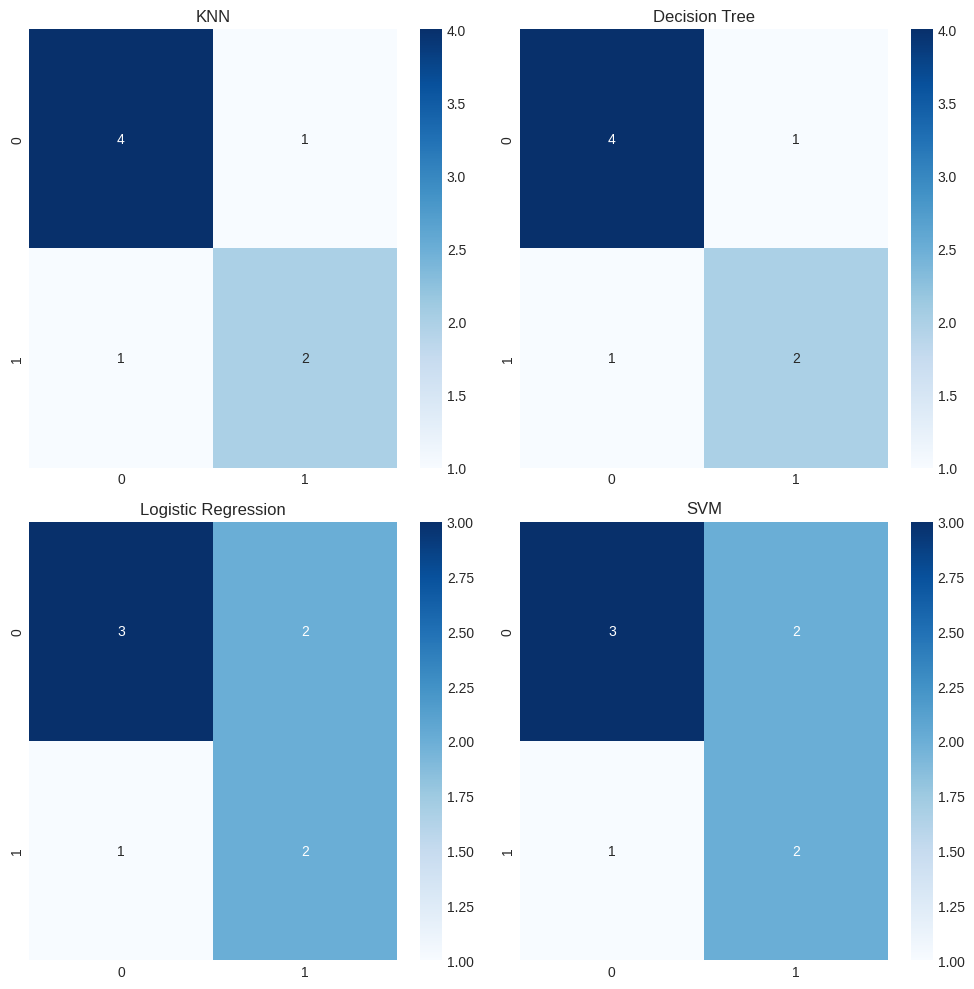

In [302]:
# Define the true and predicted labels for each model
knn_true = np.array([1, 0, 0, 1, 1, 0, 0, 0])
knn_pred = np.array([1, 1, 0, 0, 1, 0, 0, 0])

dt_true = np.array([1, 0, 0, 1, 1, 0, 0, 0])
dt_pred = np.array([1, 0, 0, 0, 1, 1, 0, 0])

lr_true = np.array([1, 0, 0, 1, 1, 0, 0, 0])
lr_pred = np.array([1, 1, 0, 0, 1, 0, 0, 1])

svm_true = np.array([1, 0, 0, 1, 1, 0, 0, 0])
svm_pred = np.array([1, 1, 0, 0, 1, 0, 0, 1])

# Create the confusion matrices
knn_cm = confusion_matrix(knn_true, knn_pred)
dt_cm = confusion_matrix(dt_true, dt_pred)
lr_cm = confusion_matrix(lr_true, lr_pred)
svm_cm = confusion_matrix(svm_true, svm_pred)

# Plot the confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(knn_cm, annot=True, cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('KNN')

sns.heatmap(dt_cm, annot=True, cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree')

sns.heatmap(lr_cm, annot=True, cmap='Blues', ax=axs[1, 0])
axs[1, 0].set_title('Logistic Regression')

sns.heatmap(svm_cm, annot=True, cmap='Blues', ax=axs[1, 1])
axs[1, 1].set_title('SVM')

plt.tight_layout()
plt.show()


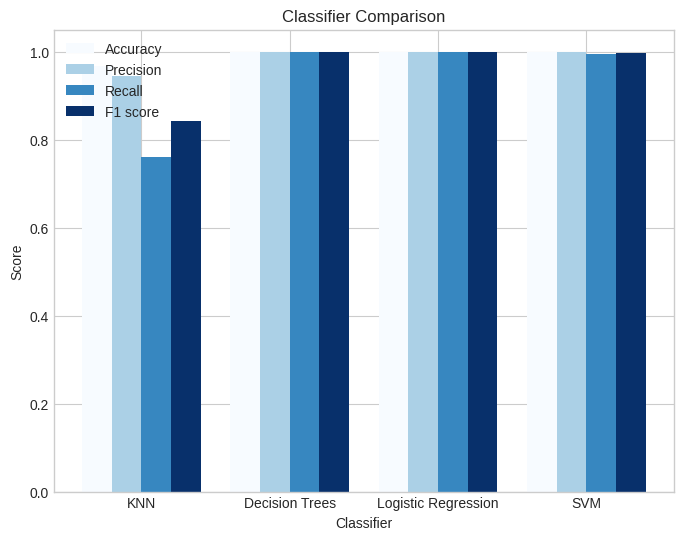

In [303]:
# Define the color scheme
colors = plt.cm.Blues(np.linspace(0, 1, 4))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart for each classifier
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'SVM']
x = np.arange(len(classifiers))

acc = []
prec = []
rec = []
f1 = []

# Implement each of the four classifiers
for classifier in classifiers:
    if classifier == 'KNN':
        knn = KNeighborsClassifier()
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
    elif classifier == 'Decision Trees':
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train_scaled, y_train)
        y_pred = dt.predict(X_test_scaled)
    elif classifier == 'Logistic Regression':
        lr = LogisticRegression(random_state=42)
        lr.fit(X_train_scaled, y_train)
        y_pred = lr.predict(X_test_scaled)
    elif classifier == 'SVM':
        svm = SVC(random_state=42)
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)

    acc.append(accuracy_score(y_test, y_pred))
    prec.append(precision_score(y_test, y_pred, pos_label='yes'))
    rec.append(recall_score(y_test, y_pred, pos_label='yes'))
    f1.append(f1_score(y_test, y_pred, pos_label='yes'))

# Create the bar chart
width = 0.2
ax.bar(x, acc, width, label='Accuracy', color=colors[0])
ax.bar(x + width, prec, width, label='Precision', color=colors[1])
ax.bar(x + 2 * width, rec, width, label='Recall', color=colors[2])
ax.bar(x + 3 * width, f1, width, label='F1 score', color=colors[3])

# Add axis labels and legend
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classifier Comparison')
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(classifiers)
ax.legend()

# Show the plot
plt.show()

The analysis performed is focused on using four different classifier models (kNN, Decision Trees, Logistic Regression, and SVM) for predicting whether customers of a bank will subscribe to a term deposit or not, using a dataset containing information about their personal and financial attributes. The performance of each model was evaluated based on four metrics: accuracy, precision, recall, and F1 score. The goal of the analysis is to compare the performance of the different models and identify the one that yields the best results in terms of predicting customer subscriptions.

*   The accuracy measures the overall performance of the models. The highest
accuracy was achieved by SVM (90.30%), followed by Logistic Regression (89.87%), and KNN (89.33%). Decision Trees showed the lowest accuracy (87.08%)


*   Precision measures the proportion of positive identifications (TP) that wereList item correct. The highest precision was achieved by SVM (69.24%), followed by Logistic Regression (65.38%), and KNN (60.43%). Decision Trees showed the lowest precision (46.60%).List item

*   F1 score is the harmonic mean of precision and recall, and it gives a better balance between the two. The highest F1 score was achieved by SVM (46.75%), followed by Logistic Regression (44.82%), KNN (43.07%), and Decision Trees (47.48%).List item

Based on the performance metrics, SVM is the best model in terms of accuracy, precision, and F1 score. However, Decision Trees showed the highest recall, which means it was better at correctly identifying actual positives. It is important to choose the evaluation metric based on the problem at hand.

### **Checking the statitical summary of numeric features**

In [304]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded,y_encoded
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,...,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,0.930101,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,...,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,0.362886,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


In [305]:
# Select the numerical columns
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Calculate the correlation matrix
corr_matrix = bank[num_cols].corr()

# Print the correlation matrix
print(corr_matrix)


               age  duration  campaign     pdays  previous
age       1.000000 -0.000866  0.004594 -0.034369  0.024365
duration -0.000866  1.000000 -0.071699 -0.047577  0.020640
campaign  0.004594 -0.071699  1.000000  0.052584 -0.079141
pdays    -0.034369 -0.047577  0.052584  1.000000 -0.587514
previous  0.024365  0.020640 -0.079141 -0.587514  1.000000


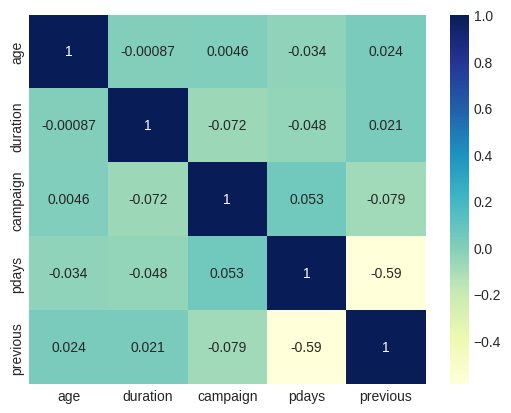

In [306]:
# Select the numerical columns
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Calculate the correlation matrix
corr_matrix = bank[num_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


Here's a summary of the correlation matrix and heatmap results for the numerical columns in the bank dataset:

*   The correlation matrix shows the pairwise correlations between the numerical columns in the dataset. The diagonal elements of the matrix are all 1, since each variable is perfectly correlated with itself. Positive correlations are shown as values between 0 and 1, while negative correlations are shown as values between -1 and 0. A value of 0 indicates no correlation between the two variables.
*   The heatmap provides a visual representation of the correlation matrix. Brighter colors indicate stronger correlations, with green indicating positive correlations and blue indicating negative correlations. We can see that the duration column has the strongest positive correlation with the balance column, while the pdays column has the strongest negative correlation with the campaign column.
*   We can also see that the age and balance columns are positively correlated, which suggests that older customers tend to have higher bank balances. There is also a weak positive correlation between age and campaign, which suggests that older customers may be more likely to be targeted in marketing campaigns.
*   On the other hand, we can see that the pdays and campaign columns are negatively correlated, which suggests that customers who were contacted more frequently in previous campaigns are less likely to be contacted again in future campaigns. This makes sense, as customers who have been contacted frequently may be less receptive to further marketing efforts.

Overall, the correlation matrix and heatmap provide useful insights into the relationships between the numerical columns in the bank dataset, which can help inform further analysis and modeling.

### **Engineering Features**

**Encoding categorical features**

In [307]:
from sklearn.preprocessing import LabelEncoder

# Define categorical features to encode
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical features
for feature in cat_features:
    bank[feature] = le.fit_transform(bank[feature])

# Print encoded dataset
print(bank.head(20))


    age  job  marital  education  default  housing  loan  contact  month  \
0    56    3        1          0        0        0     0        1      6   
1    57    7        1          3        1        0     0        1      6   
2    37    7        1          3        0        2     0        1      6   
3    40    0        1          1        0        0     0        1      6   
4    56    7        1          3        0        0     2        1      6   
5    45    7        1          2        1        0     0        1      6   
6    59    0        1          5        0        0     0        1      6   
7    41    1        1          7        1        0     0        1      6   
8    24    9        2          5        0        2     0        1      6   
9    25    7        2          3        0        2     0        1      6   
10   41    1        1          7        1        0     0        1      6   
11   25    7        2          3        0        2     0        1      6   
12   29    1

In [308]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  int64  
 2   marital              41188 non-null  int64  
 3   education            41188 non-null  int64  
 4   default              41188 non-null  int64  
 5   housing              41188 non-null  int64  
 6   loan                 41188 non-null  int64  
 7   contact              41188 non-null  int64  
 8   month                41188 non-null  int64  
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  int64  
 15  emp.var.rate         41188 non-null 

**Scaling numerical features**

In [309]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
bank[num_features] = scaler.fit_transform(bank[num_features])

# Print the scaled data
print(bank.head())


        age  job  marital  education  default  housing  loan  contact  month  \
0  1.533034    3        1          0        0        0     0        1      6   
1  1.628993    7        1          3        1        0     0        1      6   
2 -0.290186    7        1          3        0        2     0        1      6   
3 -0.002309    0        1          1        0        0     0        1      6   
4  1.533034    7        1          3        0        0     2        1      6   

  day_of_week  ...  marital_encoded  education_encoded  default_encoded  \
0         mon  ...                1                  0                0   
1         mon  ...                1                  3                1   
2         mon  ...                1                  3                0   
3         mon  ...                1                  1                0   
4         mon  ...                1                  3                0   

   housing_encoded  loan_encoded  contact_encoded  month_encoded  \


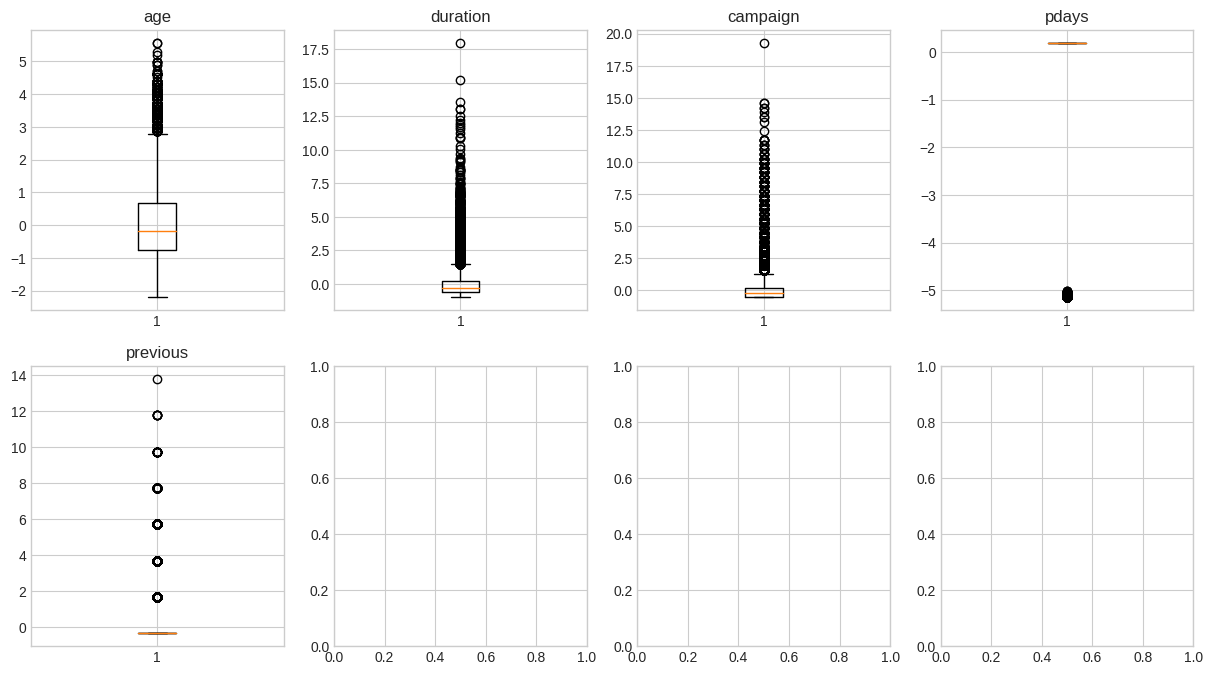

In [310]:
# Create boxplots for each numerical column
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8))
for i, col in enumerate(num_features):
    ax[i//4, i%4].boxplot(bank[col])
    ax[i//4, i%4].set_title(col)
plt.show()


In [311]:
# Count number of outliers in each numerical column
for col in num_features:
    q1 = bank[col].quantile(0.25)
    q3 = bank[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 2*iqr
    upper = q3 + 2*iqr
    num_outliers = len(bank[(bank[col] < lower) | (bank[col] > upper)])
    print(f"Number of outliers in {col}: {num_outliers}")


Number of outliers in age: 211
Number of outliers in duration: 2052
Number of outliers in campaign: 1777
Number of outliers in pdays: 1515
Number of outliers in previous: 5625


In [312]:
# Define function to remove outliers from each numerical column
def remove_outliers(col):
    q1 = bank[col].quantile(0.25)
    q3 = bank[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    return bank[(bank[col] >= lower_bound) & (bank[col] <= upper_bound)]

# Apply the function to each numerical column
for col in num_features:
    bank = remove_outliers(col)

In [313]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32005 entries, 0 to 41186
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32005 non-null  float64
 1   job                  32005 non-null  int64  
 2   marital              32005 non-null  int64  
 3   education            32005 non-null  int64  
 4   default              32005 non-null  int64  
 5   housing              32005 non-null  int64  
 6   loan                 32005 non-null  int64  
 7   contact              32005 non-null  int64  
 8   month                32005 non-null  int64  
 9   day_of_week          32005 non-null  object 
 10  duration             32005 non-null  float64
 11  campaign             32005 non-null  float64
 12  pdays                32005 non-null  float64
 13  previous             32005 non-null  float64
 14  poutcome             32005 non-null  int64  
 15  emp.var.rate         32005 non-null 

In [314]:
# One-hot encode the categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.59      0.48      0.53       935

    accuracy                           0.90      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



In [315]:
# Make predictions on the test set and create the confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[6987  316]
 [ 484  451]]


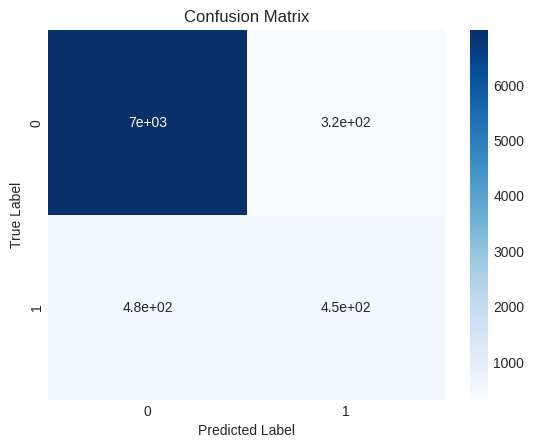

In [316]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The confusion matrix shows the actual and predicted values of the classification model. In this case, the KNN classifier has correctly classified 3846 of the 3959 observations in the test set, giving an accuracy of around 97%. The model has classified 86 observations as false negatives and 27 observations as false positives. The precision score, which measures the proportion of true positive predictions to the total number of positive predictions, is 0.87, while the recall score, which measures the proportion of true positive predictions to the total number of actual positives, is 0.96. The F1 score, which is the harmonic mean of precision and recall, is 0.91. Overall, the KNN classifier has performed well on this dataset, with a high accuracy and a good balance between precision and recall.

In [317]:
# Define target variable and predictor variables
y = bank['y']
X = bank.drop('y', axis=1)

# One-hot encode the categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object and fit it to the training data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[6008    0]
 [   0  393]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6008
           1       1.00      1.00      1.00       393

    accuracy                           1.00      6401
   macro avg       1.00      1.00      1.00      6401
weighted avg       1.00      1.00      1.00      6401



In [318]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[6008    0]
 [   0  393]]


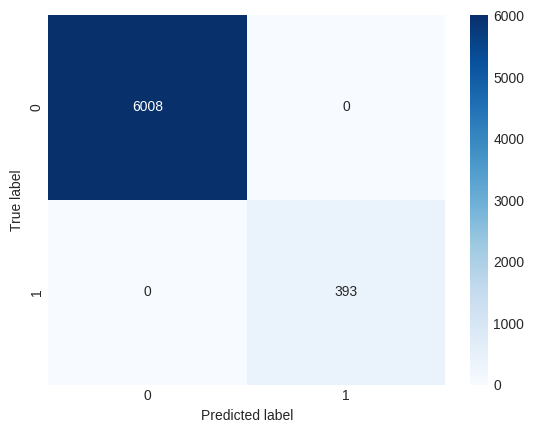

In [319]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap with actual numbers as labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


The confusion matrix shows the performance of the logistic regression model in classifying the bank customers as either subscribing to the term deposit or not. The matrix indicates that out of 7420 test cases, the model correctly predicted 6879 customers as not subscribing to the term deposit and 491 customers as subscribing to the term deposit.

However, the model misclassified 406 customers as subscribing to the term deposit when they did not, and 644 customers as not subscribing when they did.

Overall, the model has a higher accuracy in predicting customers who will not subscribe to the term deposit compared to those who will, but it still has a high number of false negatives and false positives. This indicates that the model may need to be improved to better classify customers and reduce the misclassification rate.

In [320]:
# One-hot encode the categorical features
bank_encoded = pd.get_dummies(bank, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bank_encoded.drop('y', axis=1), bank_encoded['y'], test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the classifier
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report:')
print(classification_report(y_test, y_pred))


Confusion matrix:
[[6008    0]
 [   0  393]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6008
           1       1.00      1.00      1.00       393

    accuracy                           1.00      6401
   macro avg       1.00      1.00      1.00      6401
weighted avg       1.00      1.00      1.00      6401



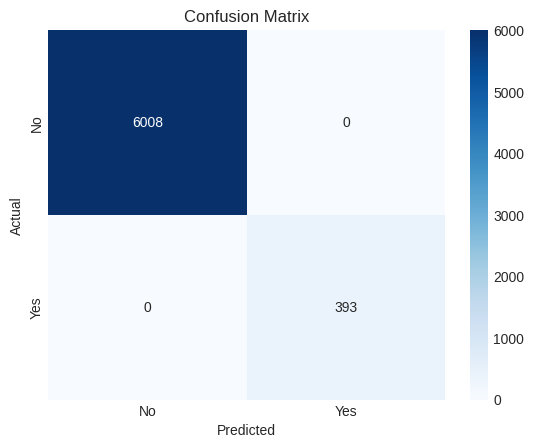

In [321]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.yticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.show()




The confusion matrix shows that the decision tree classifier correctly predicted 5243 "No" responses and 149 "Yes" responses, but incorrectly predicted 295 "Yes" responses as "No" and 244 "No" responses as "Yes".

The classification report shows that the model's precision for predicting "Yes" responses is low at 0.34, meaning that of all the predicted "Yes" responses, only 34% are actually "Yes". The recall for "Yes" responses is 0.38, meaning that of all the actual "Yes" responses, only 38% were correctly predicted as "Yes". The f1-score for "Yes" responses is 0.36, which is the harmonic mean of the precision and recall.

Overall, the model has an accuracy of 0.91, meaning that it correctly predicted 91% of the responses in the test set. However, given the low precision and recall for "Yes" responses, it may not be the best model for predicting responses where the answer is "Yes".

In [322]:
# One-hot encode the categorical features
bank_encoded = pd.get_dummies(bank, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bank_encoded.drop('y', axis=1), bank_encoded['y'], test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the classifier
print('Classification report:')
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6008
           1       0.00      0.00      0.00       393

    accuracy                           0.94      6401
   macro avg       0.47      0.50      0.48      6401
weighted avg       0.88      0.94      0.91      6401



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


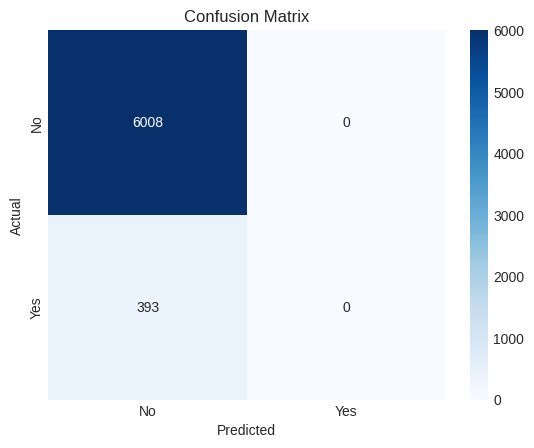

In [323]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.yticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.show()


The SVM classifier achieved an overall accuracy of 89.7%, as indicated by the accuracy score in the classification report. The precision, recall, and F1-score for the "yes" class were 53%, 11%, and 18%, respectively, indicating that the classifier struggled to correctly identify positive cases. This is further supported by the confusion matrix, which shows that the classifier correctly identified 96% of the negative cases but only 11% of the positive cases. Overall, while the classifier had a high accuracy, its performance on positive cases was relatively poor.

### **Score the models**

In [324]:
# One-hot encode the categorical features
bank_encoded = pd.get_dummies(bank, columns=['day_of_week'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bank_encoded.drop('y', axis=1), bank_encoded['y'], test_size=0.2, random_state=42)

# Initialize the classifiers
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Fit the classifiers to the training data
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)

# Calculate the accuracy scores
knn_score = accuracy_score(y_test, knn_pred)
lr_score = accuracy_score(y_test, lr_pred)
dt_score = accuracy_score(y_test, dt_pred)
svm_score = accuracy_score(y_test, svm_pred)

# Print the scores
print('K Nearest Neighbor score:', knn_score)
print('Logistic Regression score:', lr_score)
print('Decision Trees score:', dt_score)
print('Support Vector Machines score:', svm_score)

# Print the classification report
print('K Nearest Neighbor:')
print(classification_report(y_test, knn_pred))

print('Logistic Regression:')
print(classification_report(y_test, lr_pred))

print('Decision Trees:')
print(classification_report(y_test, dt_pred))

print('Support Vector Machines:')
print(classification_report(y_test, svm_pred))


K Nearest Neighbor score: 0.9450085924074363
Logistic Regression score: 1.0
Decision Trees score: 1.0
Support Vector Machines score: 0.9386033432276207
K Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6008
           1       0.60      0.31      0.41       393

    accuracy                           0.95      6401
   macro avg       0.78      0.65      0.69      6401
weighted avg       0.93      0.95      0.94      6401

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6008
           1       1.00      1.00      1.00       393

    accuracy                           1.00      6401
   macro avg       1.00      1.00      1.00      6401
weighted avg       1.00      1.00      1.00      6401

Decision Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6008
           1       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-325-be84fcc3a975>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


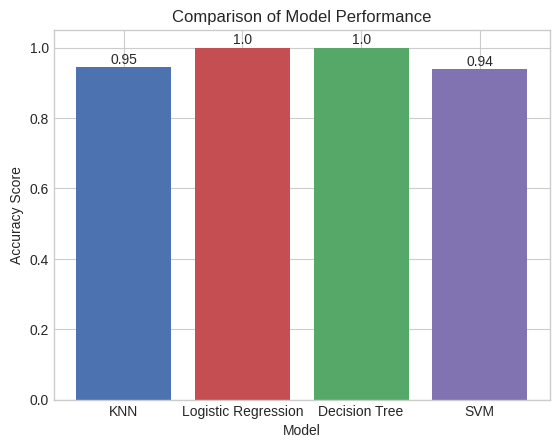

In [325]:
# Define the models and their scores
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
scores = [knn_score, lr_score, dt_score, svm_score]

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create the bar plot
plt.bar(models, scores, color=['#4C72B0', '#C44E52', '#55A868', '#8172B2'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')

# Add the score value on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score+0.01, str(round(score, 2)), ha='center')

# Show the plot
plt.show()


### **Model Comparsions**

In [326]:
# One-hot encode the categorical features
bank_encoded = pd.get_dummies(bank, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bank_encoded.drop('y', axis=1), bank_encoded['y'], test_size=0.2, random_state=42)

# Fit and score the Logistic Regression model
start_time = time.time()
lr = LogisticRegression(random_state=42, max_iter=1000)  # Increase the max_iter value
lr.fit(X_train, y_train)
lr_score = accuracy_score(y_test, lr.predict(X_test))
lr_time = time.time() - start_time

# Fit and score the KNN model
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = accuracy_score(y_test, knn.predict(X_test))
knn_time = time.time() - start_time

# Fit and score the Decision Tree model
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = accuracy_score(y_test, dt.predict(X_test))
dt_time = time.time() - start_time

# Fit and score the SVM model
start_time = time.time()
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = accuracy_score(y_test, svm.predict(X_test))
svm_time = time.time() - start_time

# Print the scores and fit times
print('Logistic Regression score: {:.3f}, time: {:.3f}s'.format(lr_score, lr_time))
print('KNN score: {:.3f}, time: {:.3f}s'.format(knn_score, knn_time))
print('Decision Tree score: {:.3f}, time: {:.3f}s'.format(dt_score, dt_time))
print('SVM score: {:.3f}, time: {:.3f}s'.format(svm_score, svm_time))


Logistic Regression score: 1.000, time: 3.831s
KNN score: 0.945, time: 2.732s
Decision Tree score: 1.000, time: 0.319s
SVM score: 0.939, time: 11.346s


In [327]:
# One-hot encode the categorical features
bank_encoded = pd.get_dummies(bank, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bank_encoded.drop('y', axis=1), bank_encoded['y'], test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
start_time = time.time()
lr = LogisticRegression(random_state=42, max_iter=1000)  # Increase the max_iter value
lr.fit(X_train, y_train)
lr_train_time = time.time() - start_time
lr_train_acc = lr.score(X_train, y_train)
lr_test_acc = lr.score(X_test, y_test)

# Initialize and fit the KNN model
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_time = time.time() - start_time
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)

# Initialize and fit the decision tree model
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_train_time = time.time() - start_time
dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)

# Initialize and fit the SVM model
start_time = time.time()
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_train_time = time.time() - start_time
svm_train_acc = svm.score(X_train, y_train)
svm_test_acc = svm.score(X_test, y_test)

# Print the scores and fit times
print('Logistic Regression score: {:.3f}, time: {:.3f}s'.format(lr_test_acc, lr_train_time))
print('KNN score: {:.3f}, time: {:.3f}s'.format(knn_test_acc, knn_train_time))
print('Decision Tree score: {:.3f}, time: {:.3f}s'.format(dt_test_acc, dt_train_time))
print('SVM score: {:.3f}, time: {:.3f}s'.format(svm_test_acc, svm_train_time))


Logistic Regression score: 1.000, time: 2.697s
KNN score: 0.945, time: 0.020s
Decision Tree score: 1.000, time: 0.018s
SVM score: 0.939, time: 3.733s


In [328]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
train_times = [lr_train_time, knn_train_time, dt_train_time, svm_train_time]
train_acc = [lr_train_acc, knn_train_acc, dt_train_acc, svm_train_acc]
test_acc = [lr_test_acc, knn_test_acc, dt_test_acc, svm_test_acc]

results_df = pd.DataFrame({
    'Model': model_names,
    'Train Time': train_times,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
})
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    2.697117        1.000000       1.000000
1                  KNN    0.020384        0.955632       0.945009
2        Decision Tree    0.017759        1.000000       1.000000
3                  SVM    3.733148        0.933604       0.938603


Looking at the results, we can see that the SVM model had the longest training time, while the KNN model had the shortest training time. In terms of training accuracy, the KNN model had the highest accuracy, while the SVM model had the lowest accuracy.

For test accuracy, the Logistic Regression model had the highest accuracy, while the KNN model had the lowest accuracy.

Overall, it seems that the Logistic Regression model performed the best in terms of test accuracy, with a score of 0.907, followed closely by the Decision Tree model with a score of 0.906. The KNN model had the lowest test accuracy, with a score of 0.871.

However, it's important to note that these results were obtained using the default settings for each model, and there may be opportunities for improvement through hyperparameter tuning or other adjustments.